In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.xmargin'] = 0.05
mpl.rcParams['axes.ymargin'] = 0.05
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'

In [3]:
from lio.utils.plot import simplex

---

In [4]:
p = np.linspace(0, 1, 25)[1:-1]
c = np.linspace(0, 1, 25)[1:-1]
p, c = np.meshgrid(p, c)

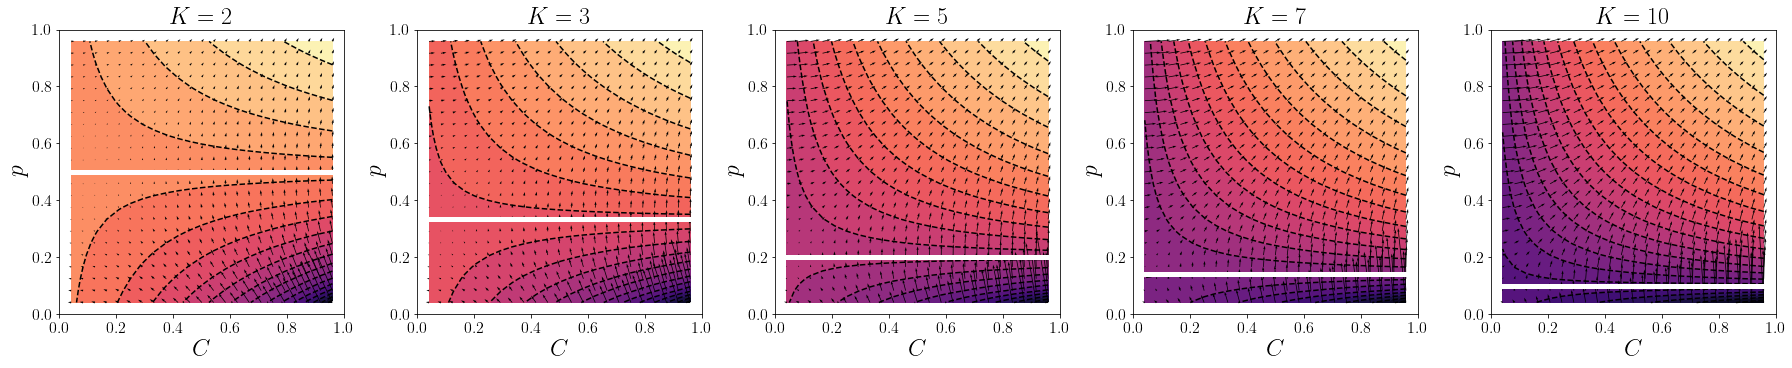

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

for ax, k in zip(axes, [2, 3, 5, 7, 10]):
    ax.set_aspect(1.)
    ax.set_xlabel('$C$')
    ax.set_ylabel('$p$')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_title(f'$K={k}$')
    
    q = c * p + (1 - c) / k
    l = np.log(q)
    dc = (p - 1 / k) / q
    dp = c / q
    
    ax.contourf(c, p, l, levels=20, cmap='magma')
    ax.contour(c, p, l, levels=20, colors='k')
    ax.quiver(c, p, dc, dp, scale=80)
    ax.axhline(1 / k, color='w', linewidth=5)

fig.tight_layout()
fig.savefig('plot/gradient_pc.pdf', dpi=100, bbox_inches='tight')

In [6]:
p = np.array(simplex.grid(3, 100)) / 100
p = p[(p > 0).all(1)]

p_ = np.array(simplex.grid(3, 15)) / 15
p_ = p_[(p_ > 0).all(1)]

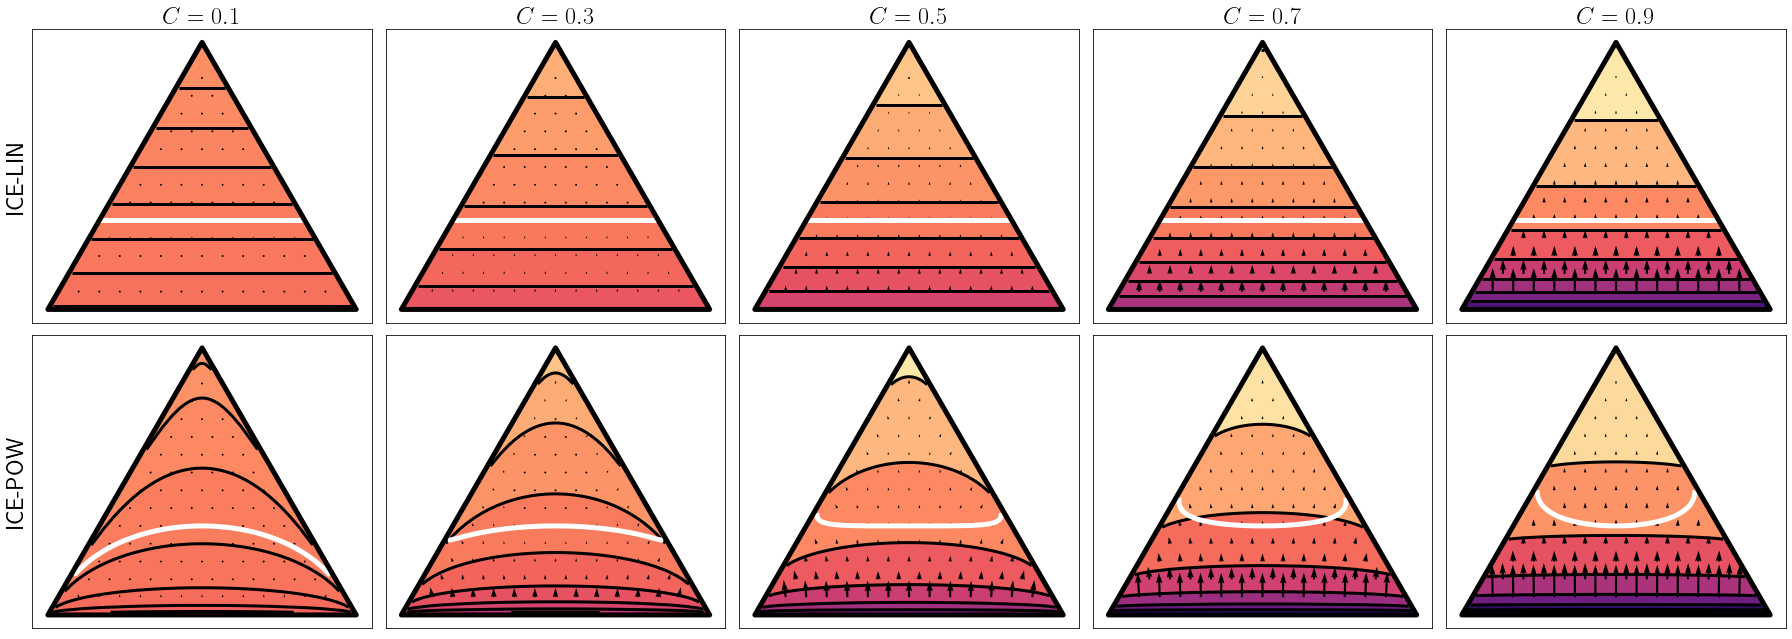

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 9))
axes[0][0].set_ylabel('ICE-LIN')
axes[1][0].set_ylabel('ICE-POW')

for ax, c in zip(axes[0], [.1, .3, .5, .7, .9]):
    q = c * p + (1 - c) / 3
    l = np.log(q[:, 0])
    
    d = c / (c * p_ + (1 - c) / 3)
    d[:, 1:] = 0

    ax.set_title(f'$C={c}$')
    simplex.init(ax)
    simplex.tricontourf(ax, p, l, levels=7, vmin=-4, vmax=0)
    simplex.tricontour(ax, p, l, levels=7, colors='k', linestyles='solid')
    simplex.lines(ax, [np.array([[1 / 3, 0, 2 / 3], [1 / 3, 2 / 3, 0]])], color='w', linewidth=5)
    simplex.quiver(ax, p_, d, scale=80)
    simplex.boundary(ax, zorder=2)

for ax, c in zip(axes[1], [.1, .3, .5, .7, .9]):
    q = p ** c
    q /= q.sum(1, keepdims=True)
    l = np.log(q[:, 0])
    r = (q * np.log(p)).sum(1) - np.log(p[:, 0])
    
    q_ = p_ ** c
    q_ /= q_.sum(1, keepdims=True)
    d = c * (np.array([1, 0, 0]) - q_) / p_
    
    simplex.init(ax)
    simplex.tricontourf(ax, p, l, levels=7, vmin=-4, vmax=0)
    simplex.tricontour(ax, p, l, levels=7, colors='k', linestyles='solid')
    simplex.tricontour(ax, p, r, colors='w', levels=[0], linewidths=5)
    simplex.quiver(ax, p_, d, scale=80)
    simplex.boundary(ax, zorder=2)

fig.tight_layout()
fig.savefig('plot/gradient_simplex.pdf', dpi=100, bbox_inches='tight')